# Inaugural project

# Importing and cleaning the data

In [154]:
# Importing libaries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import pandas as pd
import pydst
dst = pydst.Dst(lang='en')

In [155]:
# Creating columns
columns_dict = {}
columns_dict['TYPE'] = 'variable'
columns_dict['TID'] = 'month'
columns_dict['INDHOLD'] = 'value'

# Creating a dictonary for the variables we want to analyze
var_dict = {} # var is for variable
var_dict['OMXC 20 Cap (28th November 2011 = 400)'] = 'OMX' #Benchmark index
var_dict['Industrials'] = 'Industrials'
var_dict['Financials'] = 'Financials'
var_dict['Information technology'] = 'IT'

In [156]:
# Importing MPK13
MPK13_true = dst.get_data(table_id = 'MPK13', variables={'TYPE':['*'], 'TID': ['*']})
MPK13_true.head()

,TYPE,TID,INDHOLD
0,Total (OMXC end December 1995 = 100),2019M08,858
1,Energy,2019M08,3906
2,Materials,2019M08,1100
3,Industrials,2019M08,1416
4,Consumer discretions,2019M08,2100


In [157]:
# Naming columns
MPK13_true.rename(columns=columns_dict,inplace=True)

for key,value in var_dict.items():
   MPK13_true.variable.replace(key,value,inplace=True)


In [158]:
# Limiting the variables to desired ones
I = False

MPK13_true['value'].replace('..','0',inplace=True)
for key,value in var_dict.items():
    I = I | (MPK13_true.variable == value)
MPK13_true = MPK13_true[I]

MPK13_true.value = MPK13_true.value.astype('float')

In [159]:
# Investigating the structure of the df
MPK13_true.head()

,variable,month,value
3,Industrials,2019M08,1416.0
7,Financials,2019M08,1451.0
8,IT,2019M08,5507.0
10,OMX,2019M08,1140.0
18,Industrials,2019M03,1426.0


In [160]:
# Reindexing to the date
mpk13 = MPK13_true.set_index('month')
mpk13.head()

,variable,value
month,,
2019M08,Industrials,1416.0
2019M08,Financials,1451.0
2019M08,IT,5507.0
2019M08,OMX,1140.0
2019M03,Industrials,1426.0


In [161]:
# Adding columns for types
res = mpk13.pivot(columns='variable', values='value')
# Calculating monthly growth rates and appending to dataframe
res['OMX growth rate'] = ((res['OMX'] - res['OMX'].shift()) / res['OMX'].shift()) * 100 
res['Industrials growth rate'] = ((res['Industrials'] - res['Industrials'].shift()) / res['Industrials'].shift()) * 100
res['Financials growth rate'] = ((res['Financials'] - res['Financials'].shift()) / res['Financials'].shift()) * 100
res['IT growth rate'] = ((res['IT'] - res['IT'].shift()) / res['IT'].shift()) * 100

# Calculating the avg. monthly growth rates for each index
res['Avg. monthly growth rate Financials'] = ((res['Financials']['2020M02'] / res['Financials']['2013M01']) ** (1 / (12*7+2-1)) - 1) * 100
res['Avg. monthly growth rate IT'] = ((res['IT']['2020M02'] / res['IT']['2013M01']) ** (1 / (12*7+2-1)) - 1) * 100
res['Avg. monthly growth rate OMX'] = ((res['OMX']['2020M02'] / res['OMX']['2013M01']) ** (1 / (12*7+2-1)) - 1) * 100

#Investigating the structure
res.tail(12*7+2) # 7 years of 12 months plus 2 months of 2020

variable,Financials,IT,Industrials,OMX,OMX growth rate,Industrials growth rate,Financials growth rate,IT growth rate,Avg. monthly growth rate Financials,Avg. monthly growth rate IT,Avg. monthly growth rate OMX
month,,,,,,,,,,,
2013M01,1098.0,1358.0,977.0,554.0,inf,inf,inf,inf,0.417051,1.783879,0.941809
2013M02,1138.0,1496.0,1031.0,575.0,3.790614,5.527124,3.642987,10.162003,0.417051,1.783879,0.941809
2013M03,1148.0,1586.0,1026.0,572.0,-0.521739,-0.484966,0.878735,6.016043,0.417051,1.783879,0.941809
2013M04,1194.0,1667.0,949.0,566.0,-1.048951,-7.504873,4.006969,5.107188,0.417051,1.783879,0.941809
2013M05,1237.0,1768.0,958.0,581.0,2.650177,0.948367,3.601340,6.058788,0.417051,1.783879,0.941809
...,...,...,...,...,...,...,...,...,...,...,...
2019M10,1506.0,5475.0,1479.0,1153.0,0.786713,2.211472,-0.986193,1.482854,0.417051,1.783879,0.941809
2019M11,1508.0,6199.0,1610.0,1221.0,5.897658,8.857336,0.132802,13.223744,0.417051,1.783879,0.941809
2019M12,1639.0,6613.0,1661.0,1256.0,2.866503,3.167702,8.687003,6.678497,0.417051,1.783879,0.941809


Dropping unwanted rows, i.e. observations before 2013, as it only consist of OMX

In [162]:
# Total growth over the period 
totalgrowthFinancials = ((res['Financials']['2020M02'] / res['Financials']['2013M01']) - 1) * 100
print(totalgrowthFinancials)
totalgrowthIT = ((res['IT']['2020M02'] / res['IT']['2013M01']) - 1) * 100
print(totalgrowthIT)
totalgrowthOMX = ((res['OMX']['2020M02'] / res['OMX']['2013M01']) - 1) * 100
print(totalgrowthOMX)

# IT is outperforming both Financial companies and OMX C20 cap

42.44080145719491
349.4845360824742
121.84115523465704


In [163]:
# Evt. beregn volatilitet

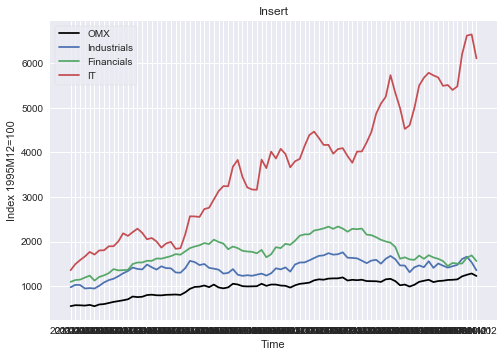

In [224]:
# Illustration of data

#Initiate figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1)


ax.plot(res['OMX']['2013M01':], color = 'black', label = 'OMX')
ax.plot(res['Industrials']['2013M01':], label = 'Industrials')
ax.plot(res['Financials']['2013M01':], label = 'Financials')
ax.plot(res['IT']['2013M01':], label = 'IT')


#Formatting the visual presentation
ax.set_xlabel('Time')
ax.set_ylabel('Index 1995M12=100')
ax.set_title('Insert')
ax.grid(True)
ax.legend(loc = 'upper left', frameon = True)

Text(0.5, 1.0, 'IT')

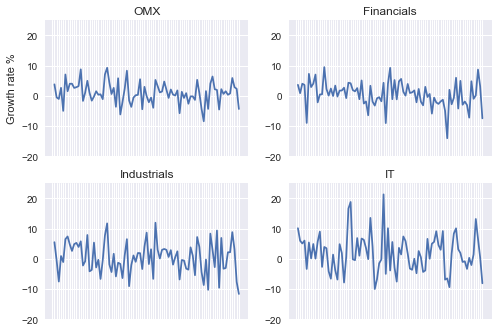

In [222]:
# Illustration of data

#Initiate figure
fig, ax = plt.subplots(2,2)

ax[0,0].plot(res['OMX growth rate']['2013M01':])
ax[1,0].plot(res['Industrials growth rate']['2013M01':])
ax[0,1].plot(res['Financials growth rate']['2013M01':])
ax[1,1].plot(res['IT growth rate']['2013M01':])


#Formatting the visual presentation
ax[0,0].set_ylim(-20, 25)
ax[1,0].set_ylim(-20, 25)
ax[0,1].set_ylim(-20, 25)
ax[1,1].set_ylim(-20, 25)
ax[0,0].set_xticklabels([])
ax[1,0].set_xticklabels([])
ax[0,1].set_xticklabels([])
ax[1,1].set_xticklabels([])
ax[0,0].set_ylabel('Growth rate %')
ax[0,0].set_title('OMX')
ax[1,0].set_title('Industrials')
ax[0,1].set_title('Financials')
ax[1,1].set_title('IT')